# IMPC Data Engineer - Interview

Date: 8 October 2023

Time for completion: 2 days

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme() # set default seaborn theme

## Import data (Question 1)

In [2]:
df_red = pd.read_csv("data/winequality/winequality-red.csv", sep=';')
df_white = pd.read_csv("data/winequality/winequality-white.csv", sep=';')

# add information about the type of wine
df_red["wine_type"] = "red"
df_white["wine_type"] = "white"

# combine into a single dataframe
df_wine = pd.concat([df_red, df_white])
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
# check for missing values
if df_wine.isna().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


## Exploratory data analysis (Question 2)

### Quick tally

We start by doing a quick tally of the quality scores across the red and white wines.

In [40]:
values, counts = np.unique(df_red['quality'], return_counts=True)
frequency_table1 = pd.DataFrame({'Quality': values, 'Frequency': counts, 'WineType': 'red'})

values, counts = np.unique(df_white['quality'], return_counts=True)
frequency_table2 = pd.DataFrame({'Quality': values, 'Frequency': counts, 'WineType': 'white'})

(
    pd.concat([frequency_table1, frequency_table2])
    .pivot(index='WineType', columns = 'Quality', values = 'Frequency')
    .fillna(0)
    .astype(int)
)

Quality,3,4,5,6,7,8,9
WineType,,,,,,,
red,10,53,681,638,199,18,0
white,20,163,1457,2198,880,175,5


<Axes: xlabel='quality', ylabel='count'>

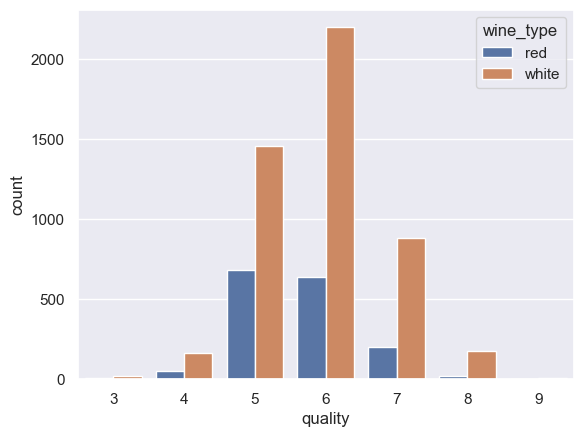

In [17]:
sns.countplot(df_wine, x='quality', hue='wine_type')

We observe that there are more white wines in this dataset than red wines, although the distribution of the quality scores is quite similar. Notably, there is only 5 white wines that **scored a 9**, but **no red wines** got this score.

### Physiochemical tests

There are eleven different physiochemical measurements for each wine sample. Let's do a simple plot 

In [42]:
df_wine.drop(['quality', 'wine_type'], axis=1).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [45]:
df_wine_long = pd.melt(df_wine, id_vars=["quality", "wine_type"])
df_wine_long.head()

,quality,wine_type,variable,value
0,5,red,fixed acidity,7.4
1,5,red,fixed acidity,7.8
2,5,red,fixed acidity,7.8
3,6,red,fixed acidity,11.2
4,5,red,fixed acidity,7.4


/Users/pittachalk/.software/miniconda3_x86/envs/ebi02156/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/pittachalk/.software/miniconda3_x86/envs/ebi02156/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


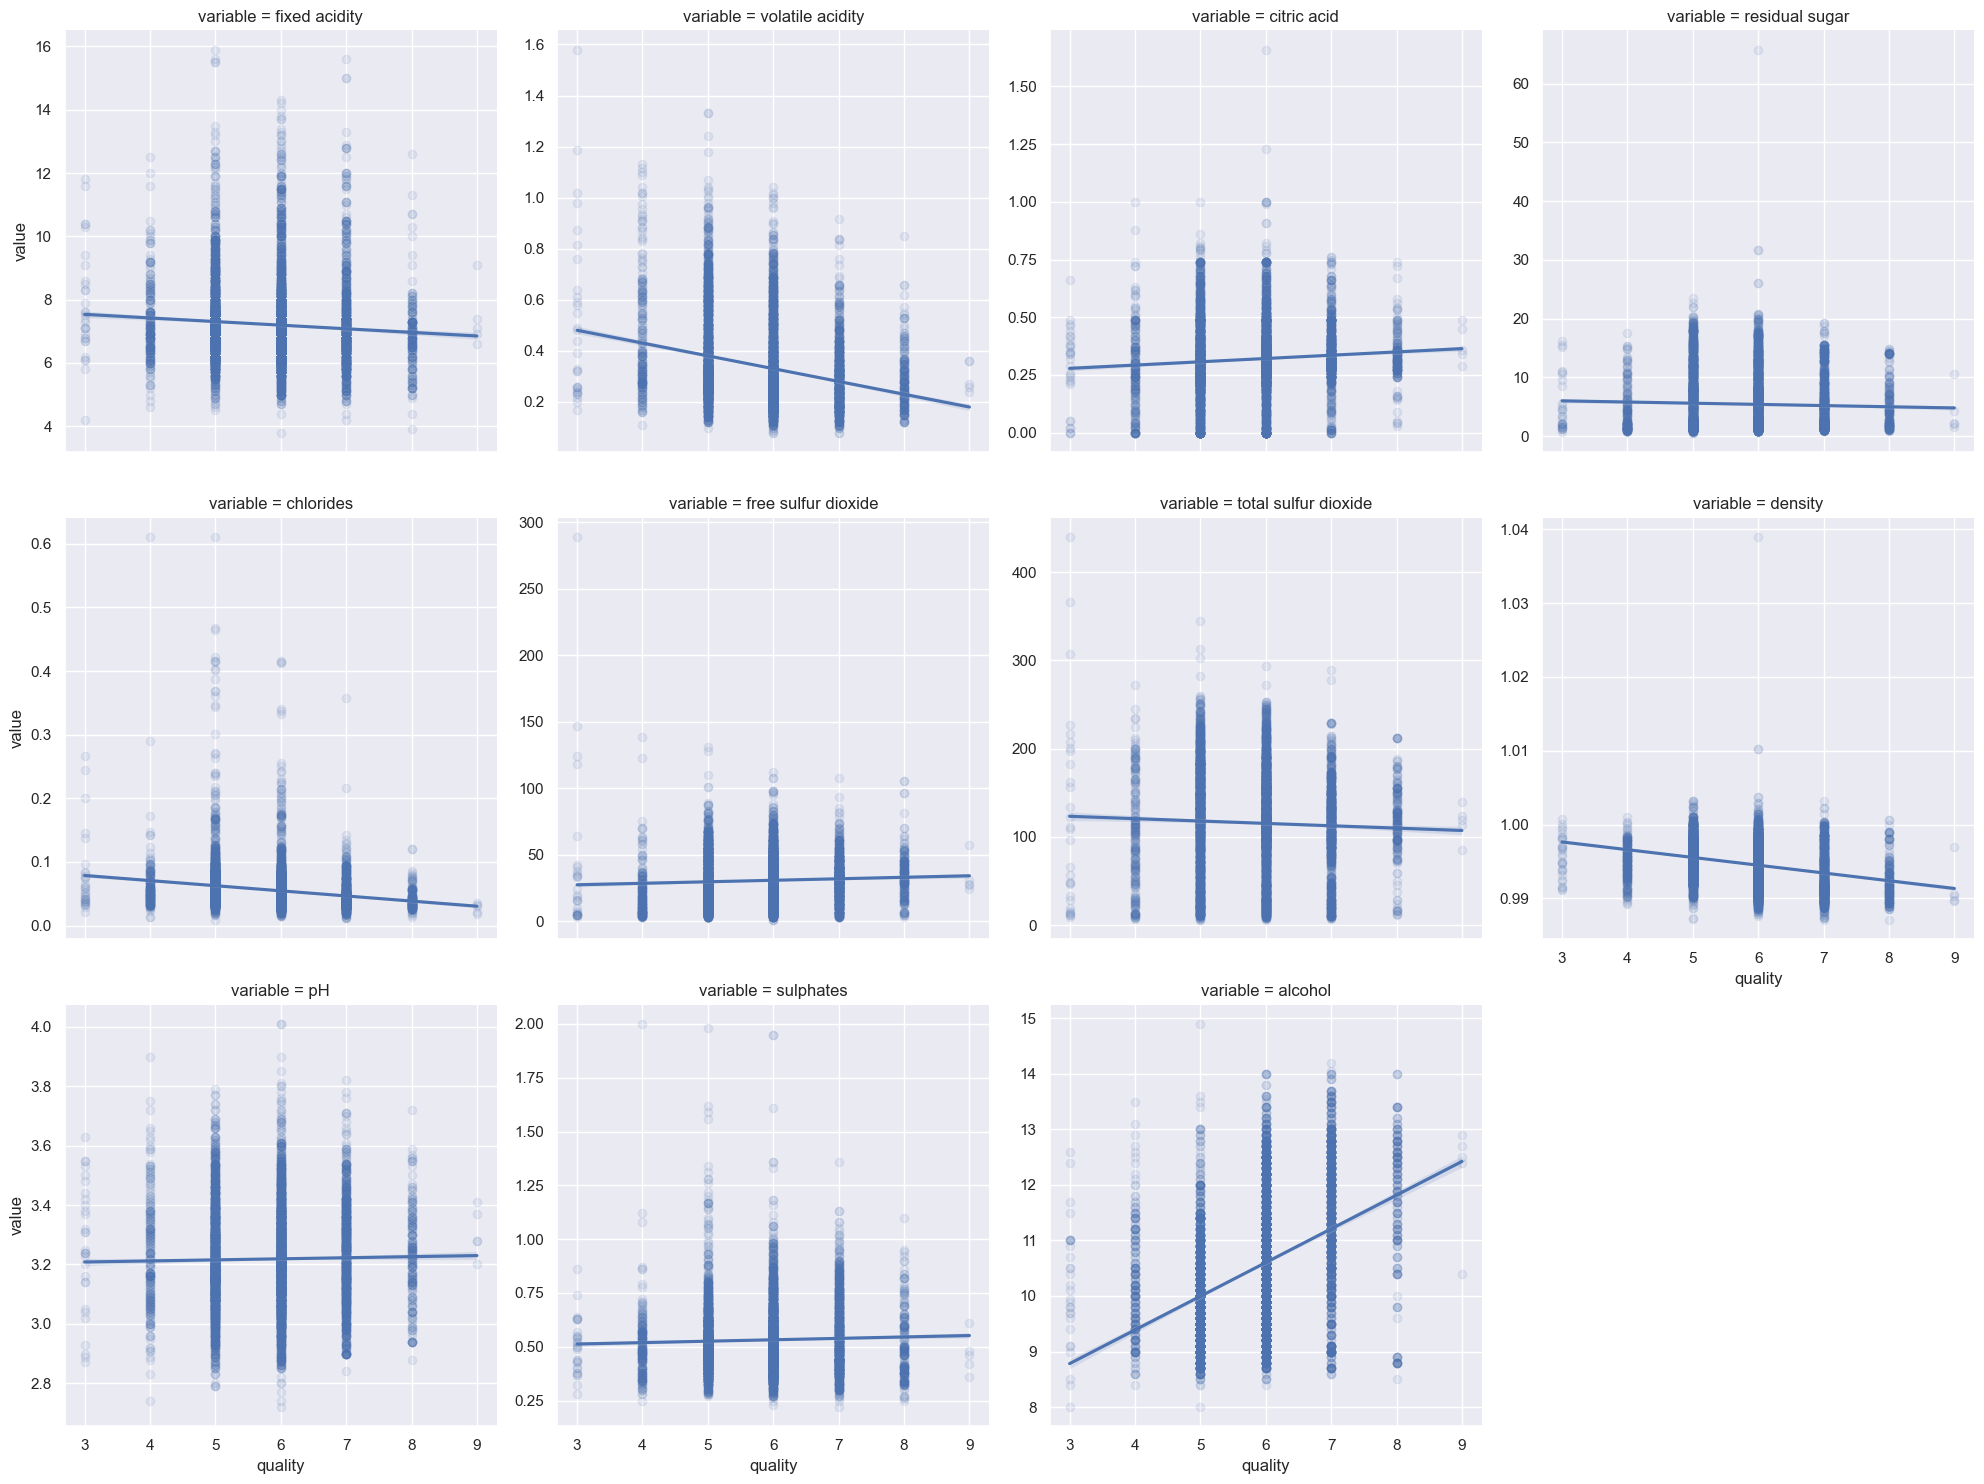

In [60]:
sns.lmplot(
    data = df_wine_long, 
    x = 'quality', y = 'value',
    scatter_kws = {"alpha": 0.05}, # modify transparency of points to reduce overplotting
    col = 'variable', col_wrap=4, sharey=False
)

/Users/pittachalk/.software/miniconda3_x86/envs/ebi02156/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


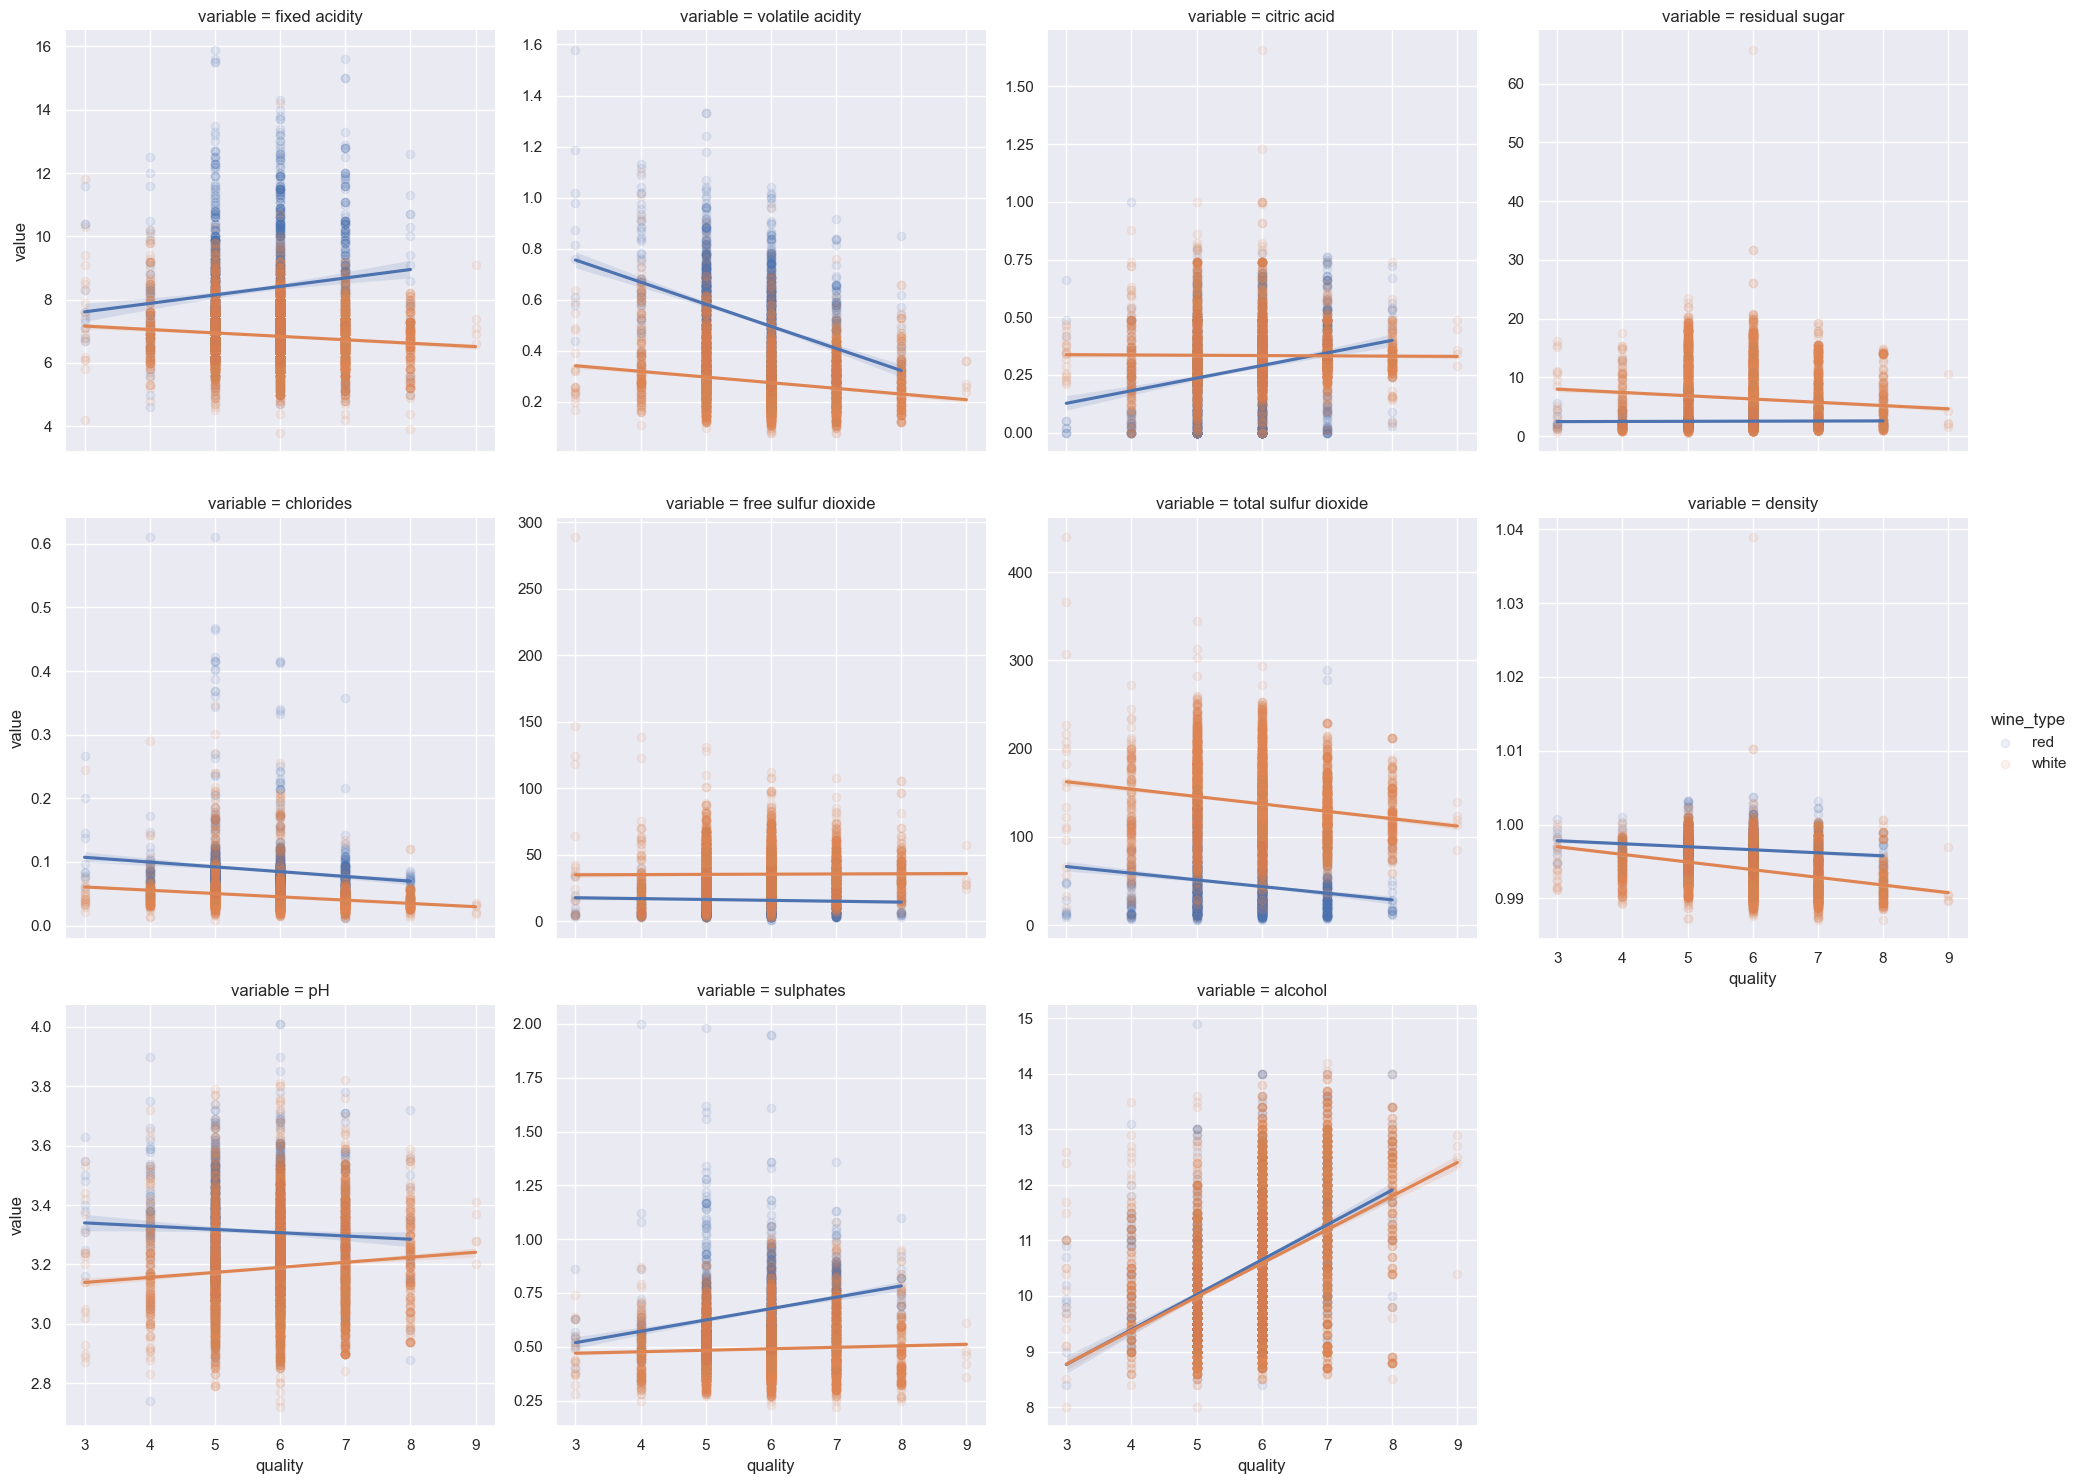

In [63]:
sns.lmplot(
    data = df_wine_long, 
    x = 'quality', y = 'value', hue = 'wine_type',
    scatter_kws = {"alpha": 0.1}, # modify transparency of points to reduce overplotting
    col = 'variable', col_wrap=4, sharey=False
)

/Users/pittachalk/.software/miniconda3_x86/envs/ebi02156/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


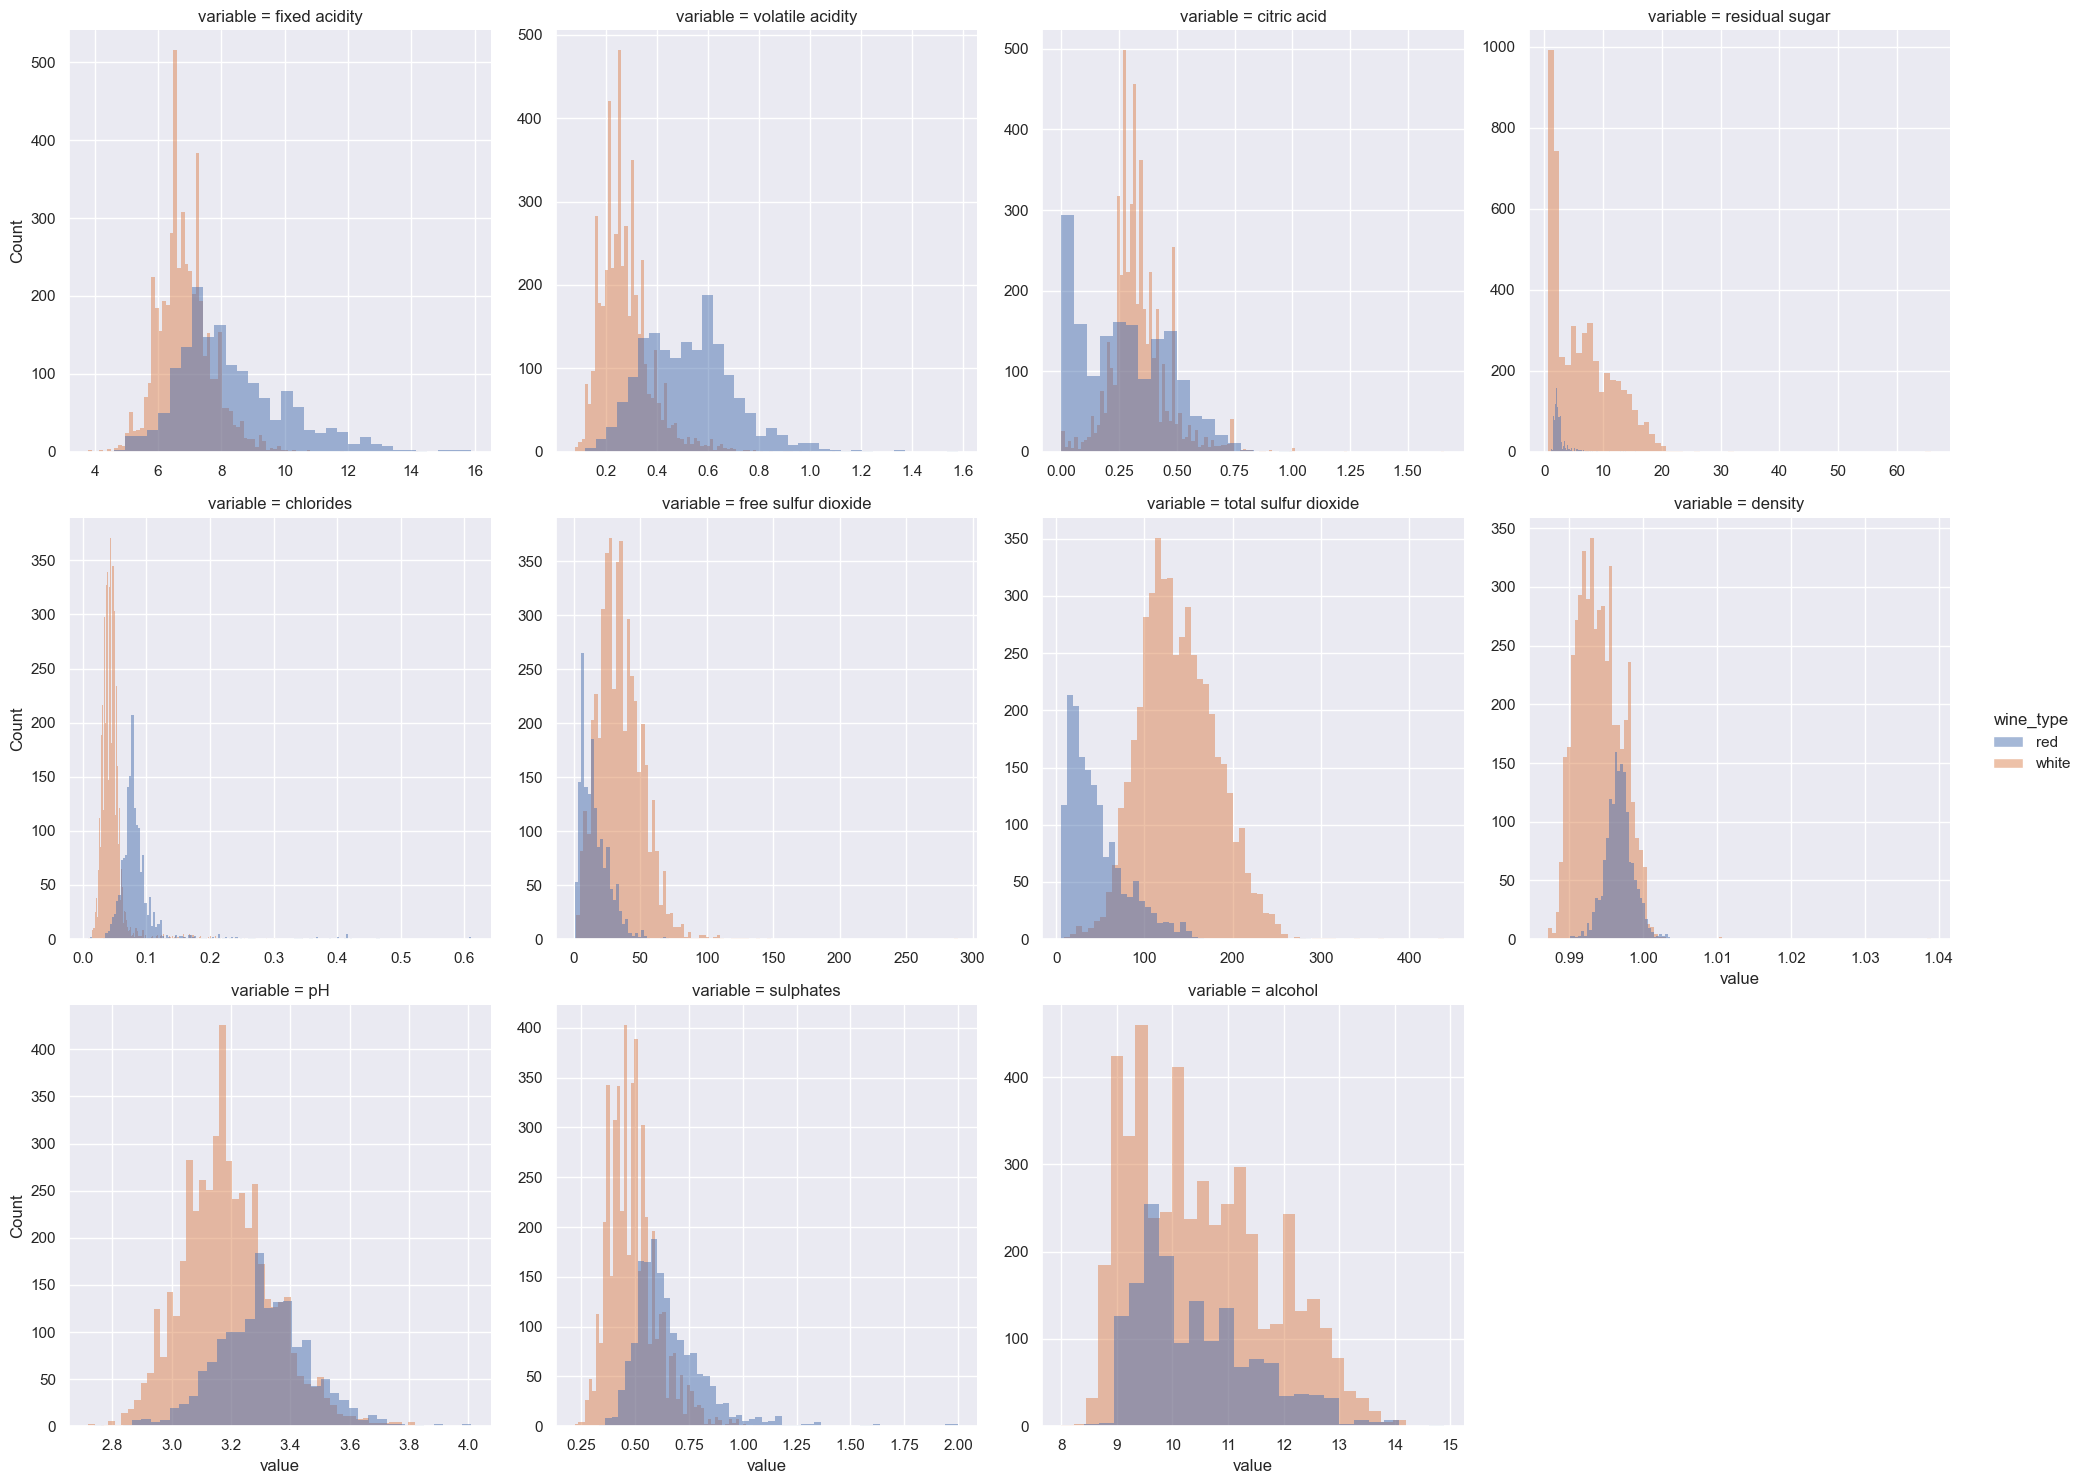

In [88]:
sns.displot(
    data = df_wine_long, 
    x = "value", hue = 'wine_type',
    col = 'variable', col_wrap=4,
    facet_kws = dict(sharex=False, sharey=False, margin_titles=True), 
    common_bins = False
)

These sseems to be soem degree of separation.

In [89]:
print("MAKE SOME SUMMARY STATISTICS!!!")

MAKE SOME SUMMARY STATISTICS!!!


## Correlation matrix and heatmap (Questions 3 & 4)

First, I plot a correlation matrix of all the 11 physiochemical tests with both types of wine bundled together.

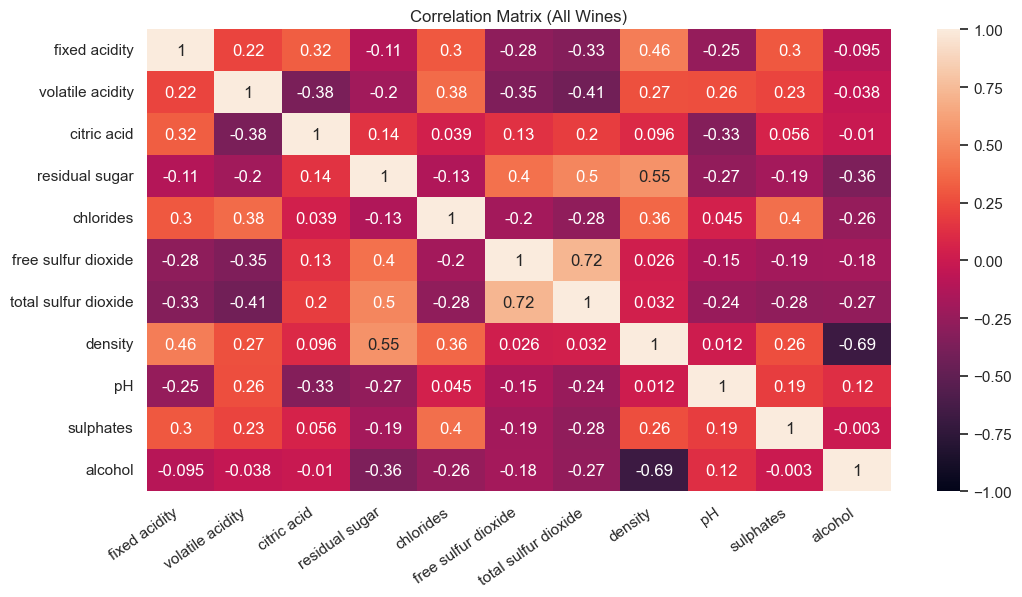

In [102]:
corr_matrix = df_wine.drop(['quality', 'wine_type'], axis=1).corr('pearson')

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Matrix (All Wines)")
plt.xticks(rotation=35, ha='right')
plt.show()

Next, I redo this plot, but for the two types of wines stratified.

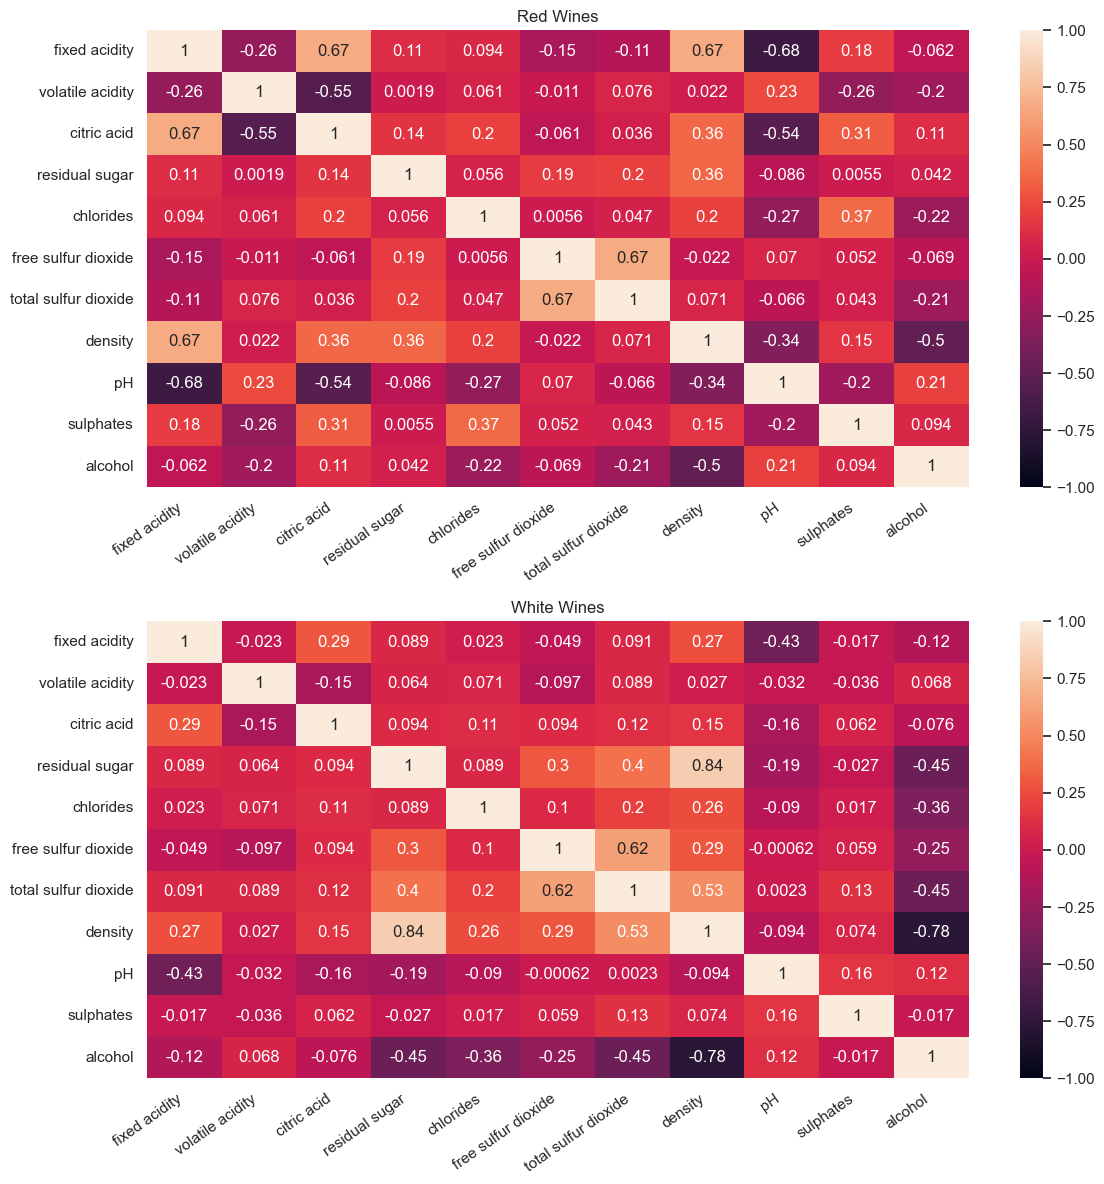

In [103]:
corr_matrix1 = df_red.drop(['quality', 'wine_type'], axis=1).corr('pearson')
corr_matrix2 = df_white.drop(['quality', 'wine_type'], axis=1).corr('pearson')

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.heatmap(corr_matrix1, vmin=-1, vmax=1, annot=True)
plt.title("Red Wines")
plt.xticks(rotation=35, ha='right')

plt.subplot(2, 1, 2)
sns.heatmap(corr_matrix2, vmin=-1, vmax=1, annot=True)
plt.title("White Wines")
plt.xticks(rotation=35, ha='right')

plt.tight_layout()
plt.show()

Interesting to see that some variables do not have a correlation. Simpson's paradox.

## Multiple linear regression analysis (Questions 5 & 6)

Say something.